# A Waiter tips5

In [1]:
import numpy as np 
import pandas as pd
pd.options.display.max_columns =None

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:/Medium/A Waiter tips/tips.csv")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

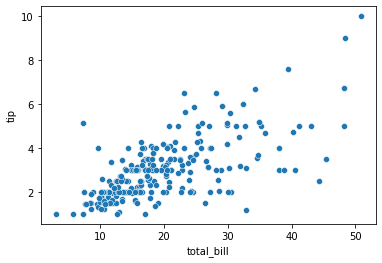

In [5]:
sns.scatterplot(x='total_bill', y='tip', data = df)

<AxesSubplot:xlabel='sex', ylabel='tip'>

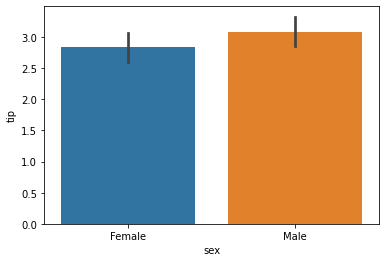

In [6]:
sns.barplot(x='sex', y='tip', data = df)

In [7]:
!pip install dabl

Note: you may need to restart the kernel to use updated packages.


In [8]:
import dabl
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

As compared to females male are more likely give tips we can aslo say males are more likely to come alone and pay tips as compared to the females.

<AxesSubplot:xlabel='day', ylabel='tip'>

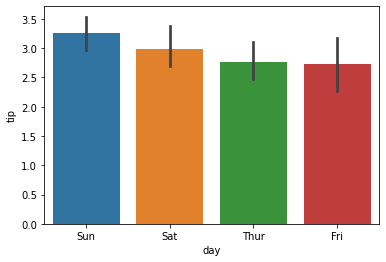

In [9]:
sns.barplot(x='day', y='tip', data = df)

most of the tips are recieved on sun ther can be sevral reasons for that

<AxesSubplot:xlabel='time', ylabel='tip'>

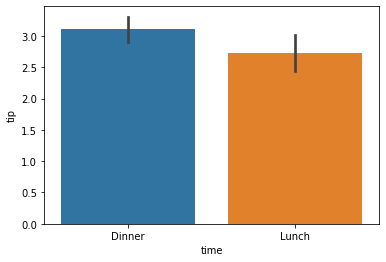

In [10]:
sns.barplot(x='time', y='tip', data = df)

Dinner time, tips are recieved more may be due to more people prefer to come at dinner time

<AxesSubplot:xlabel='total_bill', ylabel='size'>

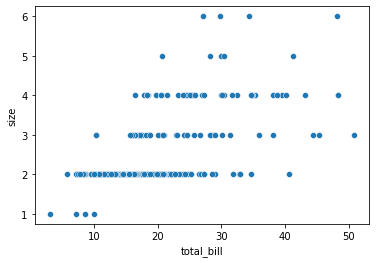

In [11]:
sns.scatterplot(x='total_bill', y='size', data = df)

<AxesSubplot:xlabel='smoker', ylabel='tip'>

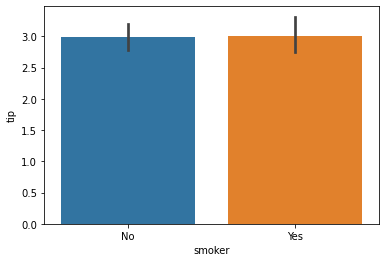

In [12]:
sns.barplot(x='smoker', y='tip', data = df)

Preprocessing

In [13]:
def preprocess_inputs(df):
    
    # mapping columns
    
    df['sex'] = df.sex.map({ 'Female' : 0, 'Male' : 1})
    df['smoker'] = df.smoker.map({ 'No' : 0, 'Yes' : 1})
    df['time'] = df.time.map({ 'Dinner' : 1, 'Lunch' : 1})
    df['day'] = df.day.map({ 'Sun' : 3, 'Sat' : 2, 'Thur' : 0, 'Fri' : 1})
    
    # scale and split the data set
    
    X = df.drop('tip', axis=1)
    Y = df['tip']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, random_state =1)
    
    # scale

    sc = StandardScaler()
    sc.fit(X_train)
    
    X_train = pd.DataFrame(sc.transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(sc.transform(X_test), columns = X.columns)
    
    
    return X_train, X_test, Y_train,Y_test

In [14]:
X_train, X_test, Y_train,Y_test = preprocess_inputs(df)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

0.4812726074179122
0.4322207433453854


In [18]:
predict = lr.predict(X_test)

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

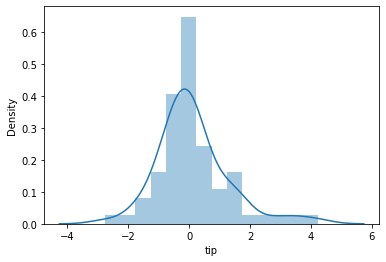

In [19]:
sns.distplot(Y_test-predict)

In [20]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(Y_test, predict))
print('MSE:', metrics.mean_squared_error(Y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(Y_test, predict)))

MAE: 0.8098165513870922
MSE: 1.3801256332408902
RMSE: 0.8998980783328144


In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
rg = Ridge()
parameters = {'alpha' : [1e-15,1e-10,1e-5,1e-2,1,5,10,20,30,40,50]}
GS=GridSearchCV(rg,parameters, cv=8)
GS.fit(X_train,Y_train)

C:\Users\ubjd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.36205e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ubjd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.2835e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ubjd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.03176e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ubjd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.19818e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ubjd\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32118e-18): result may not be accurate.
  re

GridSearchCV(cv=8, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 5, 10, 20, 30,
                                   40, 50]})

In [24]:
print(GS.best_params_)
print(GS.best_score_)

{'alpha': 10}
0.35578107012756455


In [25]:
predict=GS.predict(X_test)

C:\Users\ubjd\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

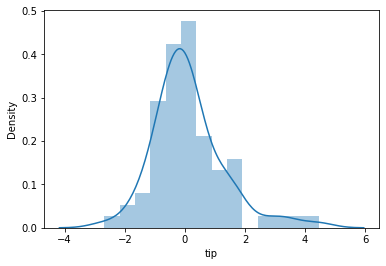

In [26]:
sns.distplot(Y_test-predict)

In [27]:
print('MAE:', metrics.mean_absolute_error(Y_test, predict))
print('MSE:', metrics.mean_squared_error(Y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(Y_test, predict)))

MAE: 0.8204780570823554
MSE: 1.3883448567519296
RMSE: 0.9058024382183764
